<a href="https://colab.research.google.com/github/khushiyadav03/Machine-Learning/blob/main/Decision_Tree_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Classification using Decision Tree

This notebook demonstrates how to build a Decision Tree Classifier to classify the Iris dataset.

## 1. Importing Libraries

We start by importing the necessary libraries: `pandas` for data manipulation, `sklearn` for machine learning tasks, and `matplotlib` for visualization.

In [25]:
# importing libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

## 2. Loading the Dataset

We load the Iris dataset, which is a classic dataset for classification tasks. It contains measurements of sepal length, sepal width, petal length, and petal width for three species of iris flowers.

In [26]:
# load dataset
iris = load_iris()

## 3. Converting to DataFrame

We convert the dataset into a pandas DataFrame for easier data manipulation and analysis. We also add the target variable (species) to the DataFrame.

In [27]:
# dataset -> dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

Let's display the first few rows of the DataFrame to get a glimpse of the data.

In [28]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 4. Separating Features and Target Variable

We separate the features (input variables) and the target variable (output variable) into `X` and `Y` respectively. `X` will contain the sepal and petal measurements, and `Y` will contain the species labels.

In [29]:
# separate features and target variable
X = df.drop('target', axis=1) # Features are all columns except 'target'
Y = df['target'] # Target variable is the 'target' column

Let's look at the features (`X`).

In [30]:
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


And the target variable (`Y`).

In [31]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


## 5. Splitting Data into Training and Testing Sets

We split the data into training and testing sets. The training data will be used to train the model, and the testing data will be used to evaluate its performance. We use 80% of the data for training and 20% for testing. `random_state` is set for reproducibility.

In [32]:
# training testing data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Let's see the training features (`X_train`).

In [33]:
print(X_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                 4.6               3.6                1.0               0.2
15                 5.7               4.4                1.5               0.4
65                 6.7               3.1                4.4               1.4
11                 4.8               3.4                1.6               0.2
42                 4.4               3.2                1.3               0.2
..                 ...               ...                ...               ...
71                 6.1               2.8                4.0               1.3
106                4.9               2.5                4.5               1.7
14                 5.8               4.0                1.2               0.2
92                 5.8               2.6                4.0               1.2
102                7.1               3.0                5.9               2.1

[120 rows x 4 columns]


And the testing features (`X_test`).

In [34]:
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73                 6.1               2.8                4.7               1.2
18                 5.7               3.8                1.7               0.3
118                7.7               2.6                6.9               2.3
78                 6.0               2.9                4.5               1.5
76                 6.8               2.8                4.8               1.4
31                 5.4               3.4                1.5               0.4
64                 5.6               2.9                3.6               1.3
141                6.9               3.1                5.1               2.3
68                 6.2               2.2                4.5               1.5
82                 5.8               2.7                3.9               1.2
110                6.5               3.2                5.1               2.0
12                 4.8               3.0                1.4     

## 6. Model Training

We initialize a Decision Tree Classifier model and train it using the training data (`X_train` and `Y_train`). `random_state` is set for reproducibility.

In [35]:
model = DecisionTreeClassifier(random_state=42)

In [36]:
# training model on training data
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

## 7. Making Predictions

We use the trained model to make predictions on the testing data (`X_test`).

In [37]:
Y_pred = model.predict(X_test)

## 8. Evaluating the Model

We evaluate the performance of the model using various metrics:

- **Accuracy:** The proportion of correctly classified instances.
- **Classification Report:** Provides precision, recall, f1-score, and support for each class.
- **Confusion Matrix:** A table that summarizes the performance of the classification model.

In [38]:
# calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [39]:
# Display a detailed classification report
print(classification_report(Y_test, Y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [40]:
# confusion matrix
print(confusion_matrix(Y_test, Y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## 9. Visualizing the Decision Tree

We can visualize the trained decision tree to understand how it makes predictions. Each node in the tree represents a decision rule based on a feature, and the leaves represent the predicted class.

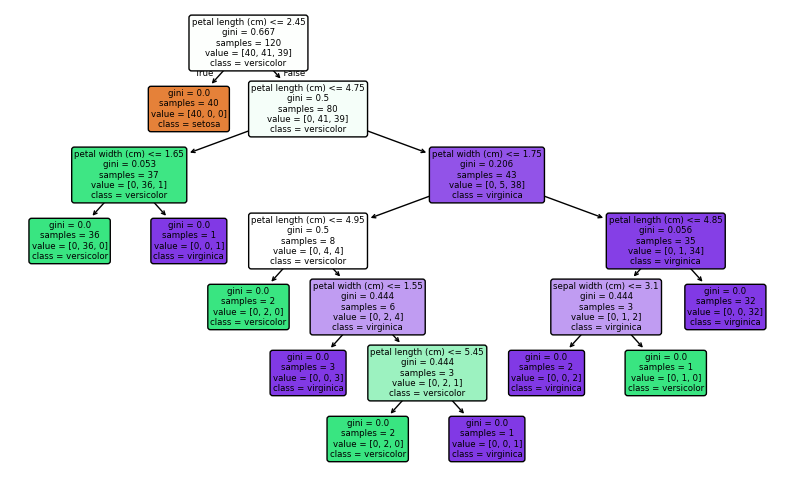

In [41]:
# visualize the trained decision tree
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()